#Lab Assignment - 1
**2023-CS543 Reinforcement Learning Lab.** \\
Instructor : Shashi Shekhar Jha (shashi@iitrpr.ac.in)

**Due on 05-02-2024   2400 Hrs   (150 Marks)**

**Submission Instructions**:
All submissions are through google classroom, uploading a single colab notebook with .ipynb extension. Go to file->Download-> Download .ipynb in colab to download the file.

In case you face any trouble with the submission, please contact the TAs:

Shivam Kainth, shivam.20csz0006@iitrpr.ac.in

Rahul Narava, syam.21csz0018@iitrpr.ac.in

Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.

Late submissions will attract penalties.

**Penalty Policy**: There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. For the 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.


**Naming Instructions**:
Name the colab file submission as follows: \<YourName>_\<rollnumber>_Lab1.ipynb

E.g. if your name is ABC, roll number is 2023csx1234 and submission is for lab1 then you should name the colab file as: ABC_2023csx1234_lab1.ipynb


**In this assignment, you will implement the Value Iteration, Policy Iteration and Monte Carlo Prediction. The assignment will focus on two openai Gym environments namely FrozenLake-v1 and Taxi-v3 along with some real-world inspired problems.**

#Frozen lake environment

Frozen lake involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. The player may not always move in the intended direction due to the slippery nature of the frozen lake.

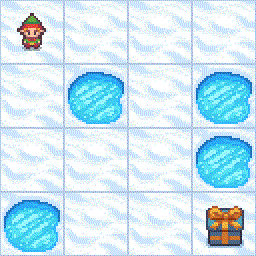

**Description**
The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world e.g. [3,3] for the 4x4 environment.

Holes in the ice are distributed in set locations when using a pre-determined map or in random locations when a random map is generated.

The agent makes moves until it reaches the goal or fall in a hole.

The lake is slippery so the agent may move perpendicular to the intended direction sometimes.

Randomly generated worlds will always have a path to the goal.

**Action Space**

The action shape is (1,) in the range {0, 3} indicating which direction to move:

0: Move left

1: Move down

2: Move right

3: Move up

**Observation Space**

The observation is a value representing the agent’s current position as current_row * nrows + current_col (where both the row and col start at 0).

For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15. The number of possible observations is dependent on the size of the map.

The observation is returned as an int().

**Starting State**

The episode starts with the agent in state [0] (location [0, 0]).

**Rewards**

Reward schedule:

Reach goal: +1
Reach hole: 0
Reach frozen: 0

**Episode End**
The episode ends if the following happens:

Termination:

The agent moves into a hole.

The player reaches the goal at max(nrow) * max(ncol) - 1 (location [max(nrow)-1, max(ncol)-1]).

Truncation (when using the time_limit wrapper):
The length of the episode is 100 for 4x4 environment, 200 for 8x8 environment.

**If desc=None then map_name will be used. If both desc and map_name are None a random 8x8 map with 80% of locations frozen will be generated.**

**is_slippery=True: If true the agent will move in intended direction with probability of 1/3 else will move in either perpendicular direction with equal probability of 1/3 in both directions.**

For example, if action is left and is_slippery is True, then:

P(move left)=1/3

P(move up)=1/3

P(move down)=1/3

Documentation:
https://gymnasium.farama.org/environments/toy_text/frozen_lake/

# Taxi environement

The Taxi Problem involves navigating to passengers in a grid world, picking them up and dropping them off at one of four locations.

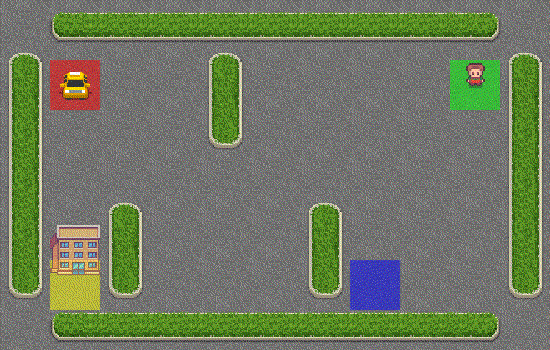

**Description**
There are four designated pick-up and drop-off locations (Red, Green, Yellow and Blue) in the 5x5 grid world. The taxi starts off at a random square and the passenger at one of the designated locations.

The goal is move the taxi to the passenger’s location, pick up the passenger, move to the passenger’s desired destination, and drop off the passenger. Once the passenger is dropped off, the episode ends.

The player receives positive rewards for successfully dropping-off the passenger at the correct location. Negative rewards for incorrect attempts to pick-up/drop-off passenger and for each step where another reward is not received.

**Action Space**
The action shape is (1,) in the range {0, 5} indicating which direction to move the taxi or to pickup/drop off passengers.

0: Move south (down)

1: Move north (up)

2: Move east (right)

3: Move west (left)

4: Pickup passenger

5: Drop off passenger

**Observation Space**
There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is in the taxi), and 4 destination locations.

Destination on the map are represented with the first letter of the color.

Passenger locations:

0: Red

1: Green

2: Yellow

3: Blue

4: In taxi

Destinations:

0: Red

1: Green

2: Yellow

3: Blue

An observation is returned as an int() that encodes the corresponding state, calculated by ((taxi_row * 5 + taxi_col) * 5 + passenger_location) * 4 + destination

Note that there are 400 states that can actually be reached during an episode. The missing states correspond to situations in which the passenger is at the same location as their destination, as this typically signals the end of an episode. Four additional states can be observed right after a successful episodes, when both the passenger and the taxi are at the destination. This gives a total of 404 reachable discrete states.

**Starting State**
The episode starts with the player in a random state.

**Rewards**
-1 per step unless other reward is triggered.

+20 delivering passenger.

-10 executing “pickup” and “drop-off” actions illegally.

An action that results a noop, like moving into a wall, will incur the time step penalty. Noops can be avoided by sampling the action_mask returned in info.

**Episode End**
The episode ends if the following happens:

Termination: 1. The taxi drops off the passenger.

Truncation (when using the time_limit wrapper): 1. The length of the episode is 200.

**As taxi is not stochastic, the transition probability is always 1.0.**

Documentation:
https://gymnasium.farama.org/environments/toy_text/taxi/

# Questions for the above mention Gym Environments

**Note: all the observations should also be separately added/commented to your solution along with plots for better undersatnding of your results**


---


Q1. **Value Iteration**: Implement Value Iteration algorithm for the FrozenLake-v1 and Taxi-v3. Use 5 different values of the $\gamma$ paramter i.e. $[ 0.1,0.3,0.5,0.7, 0.99]$ and record the number of iterations required to converge in each case. Plot a graph showing $\gamma$ values on x-axis and the corresponding number of iterations till convergances on y-axis for both the environments.
In another graph, plot the value function of the start state ($s_0$) for each value of $\gamma$ for the FrozenLake. In case of taxi environment select the max norm over the value function for comparison.

Write your observations from these plots. Does the different values of $\gamma$ result in the same policy for each envrionemnt? Briefly discuss based on your observations. **[ 20 points]**


---


Q2. **Policy iteration**: Implement Policy Iteration algorithm for the FrozenLake-v1 and Taxi-v3. Use 5 different values of the $\gamma$ paramter i.e. $[ 0.1,0.3,0.5,0.7, 0.99]$ and record the number of iterations required to converge in each case. Plot a graph showing $\gamma$ values on x-axis and the corresponding total number of iterations till convergances on y-axis for both the environments. Also, plot the value function for the start state in case of FrozenLake and select max norm over the value function in case of taxi environment.

Does the policy converge before the value function in policy iteration? Comment based on your observations. **[20 points]**


---


Q3. Between policy iteration and value iteration, which one converges early to the optimal policy in each environment? Briefly discuss this based on your observations in the previous two questions. **[5 points]**


---


Q4: Impelment first-visit Monte-carlo prediction for estimating value function for FrozenLake-v1. Compare the converged value function found using monte carlo prediction to that of value iteration. Show your comparison using plots and comment on the performance of Monte-carlo prediction **[15 points]**

==============================================================================


FrozenLake-v1 Optimal Policy for Gamma=0.1: [1 3 2 3 0 0 0 0 3 1 0 0 0 2 1 0]
FrozenLake-v1 Optimal Policy for Gamma=0.3: [1 3 2 3 0 0 0 0 3 1 0 0 0 2 1 0]
FrozenLake-v1 Optimal Policy for Gamma=0.5: [1 3 2 3 0 0 0 0 3 1 0 0 0 2 1 0]
FrozenLake-v1 Optimal Policy for Gamma=0.7: [1 3 2 3 0 0 0 0 3 1 0 0 0 2 1 0]
FrozenLake-v1 Optimal Policy for Gamma=0.99: [0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]


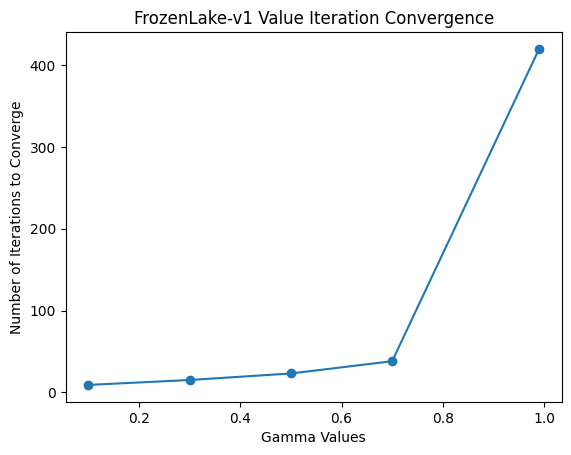

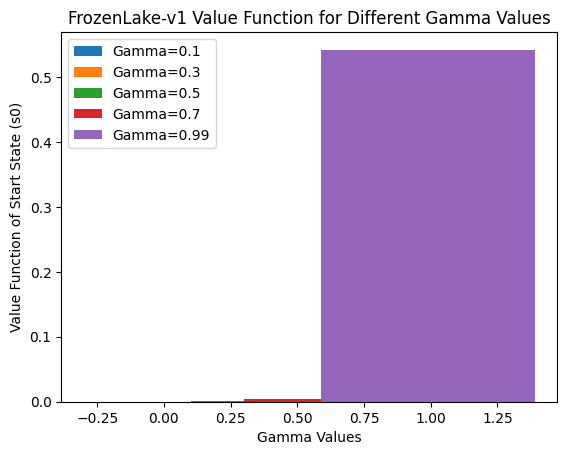

Taxi-v3 Optimal Policy for Gamma=0.1: [4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 4 4 4 4 0 0 0 0 0 0 0 0 0 5 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 2 0 2 0 0 0 0 2 2 2 2 1 2 0 2 1 1
 1 1 0 2 0 2 3 3 3 3 2 2 2 2 1 2 3 2 3 3 3 3 1 1 1 1 3 3 3 3 2 2 2 2 3 1 3
 2 3 0 3 3 1 1 1 1 3 0 3 3 0 0 0 0 3 1 3 0 3 0 3 0 1 1 1 1 3 0 3 0 0 0 0 0
 3 1 3 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0
 1 4 4 4 4 0 1 0 1 1 1 5 1 1 2 1 1 2 1 2 1 1 2 1 1 2 1 2 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 1 2 4 4 4

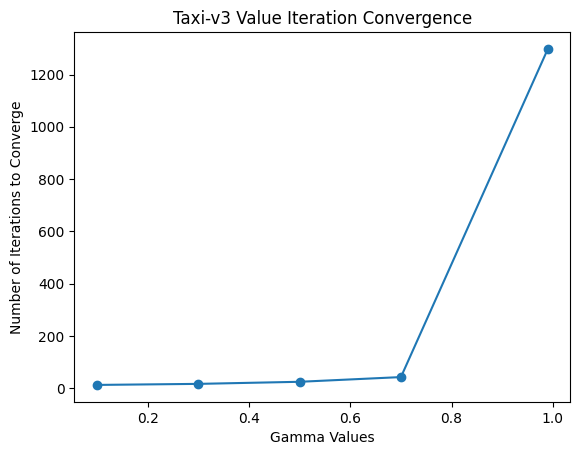

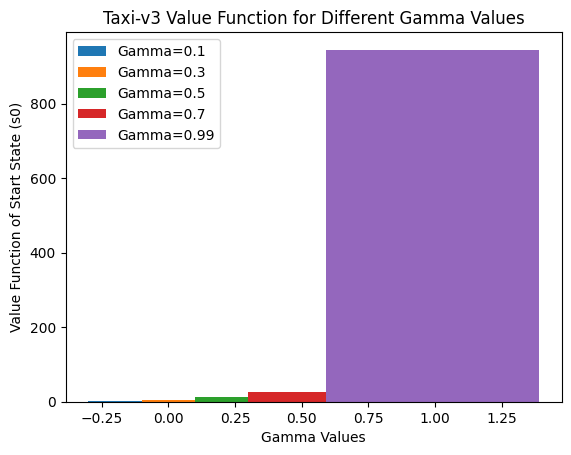

In [ ]:
#Q1 Solution:

import numpy as np
import matplotlib.pyplot as plt
import gym

def maxOverA(env,state,V, num_actions):

        state_action_values = np.zeros(num_actions)

        for action in range(num_actions):
            for prob, next_state, reward, _ in env.P[state][action]:

                state_action_values[action] += prob * (reward + gamma * V[next_state])

        return state_action_values

def ValueIteration(env, gamma, epsilon=1e-10):

    actionsNum = env.action_space.n
    statesNum = env.observation_space.n

    V = np.zeros(statesNum)
    policy = np.zeros(statesNum, dtype=int)

    iterationCount = 0

    while True:
        delta = 0
        for state in range(statesNum):
            v = V[state]
            V[state] = max(maxOverA(env, state, V, actionsNum))

            policy[state] = np.argmax(maxOverA(env, state, V, actionsNum))

            delta = max(delta, abs(v - V[state]))

        iterationCount += 1

        if delta < epsilon:
            break

    return V,policy, iterationCount

def IterationsVSGamma(gammas, iterations, title):
    plt.plot(gammas, iterations, marker='o')
    plt.title(title)
    plt.xlabel('Gamma Values')
    plt.ylabel('Number of Iterations to Converge')
    plt.show()

def ConvergeValFUnction(values, gammas, title):
    for value, gamma in zip(values, gammas):
        plt.bar([gamma], [value], label=f'Gamma={gamma}')

    plt.title(title)
    plt.xlabel('Gamma Values')
    plt.ylabel('Value Function of Start State (s0)')
    plt.legend()
    plt.show()

gammas = [0.1, 0.3, 0.5, 0.7, 0.99]

env_frozenlake = gym.make('FrozenLake-v1', is_slippery=True)
frozenlake_iterations = []
frozenlake_value_functions = []
frozenlake_optimal_policies = []

for gamma in gammas:

    V, optimal_policy,iterations = ValueIteration(env_frozenlake, gamma)
    frozenlake_value_functions.append(V[0])
    frozenlake_optimal_policies.append(optimal_policy)
    frozenlake_iterations.append(iterations)



for gamma, optimal_policy in zip(gammas, frozenlake_optimal_policies):

    print(f'FrozenLake-v1 Optimal Policy for Gamma={gamma}: {optimal_policy}')

IterationsVSGamma(gammas, frozenlake_iterations, 'FrozenLake-v1 Value Iteration Convergence')
ConvergeValFUnction(frozenlake_value_functions, gammas, 'FrozenLake-v1 Value Function for Different Gamma Values')

env_taxi = gym.make('Taxi-v3')
taxi_iterations = []
taxi_optimal_policies = []
taxi_value_functions=[]

for gamma in gammas:
    V, optimal_policy, iterations = ValueIteration(env_taxi, gamma)
    taxi_value_functions.append(V[0])
    taxi_optimal_policies.append(optimal_policy)
    taxi_iterations.append(iterations)



for gamma, optimal_policy in zip(gammas, taxi_optimal_policies):
    print(f'Taxi-v3 Optimal Policy for Gamma={gamma}: {optimal_policy}')

IterationsVSGamma(gammas, taxi_iterations, 'Taxi-v3 Value Iteration Convergence')
ConvergeValFUnction(taxi_value_functions, gammas, 'Taxi-v3 Value Function for Different Gamma Values')


FrozenLake-v1 Optimal Policy for Gamma=0.1: [2 3 2 3 0 0 0 0 3 1 0 0 0 2 1 0]
FrozenLake-v1 Optimal Policy for Gamma=0.3: [1 3 2 3 0 0 0 0 3 1 0 0 0 2 1 0]
FrozenLake-v1 Optimal Policy for Gamma=0.5: [1 3 2 3 0 0 0 0 3 1 0 0 0 2 1 0]
FrozenLake-v1 Optimal Policy for Gamma=0.7: [1 3 2 3 0 0 0 0 3 1 0 0 0 2 1 0]
FrozenLake-v1 Optimal Policy for Gamma=0.99: [0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]


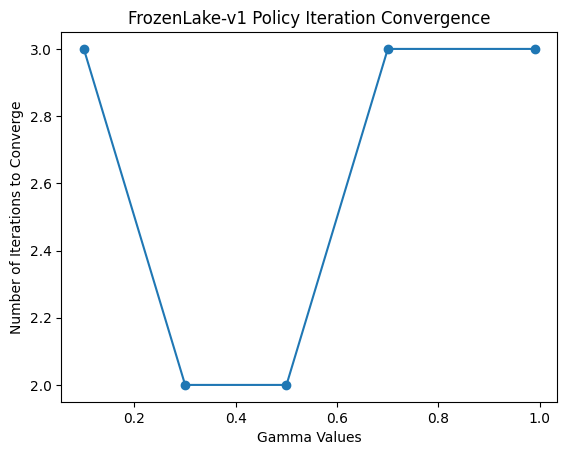

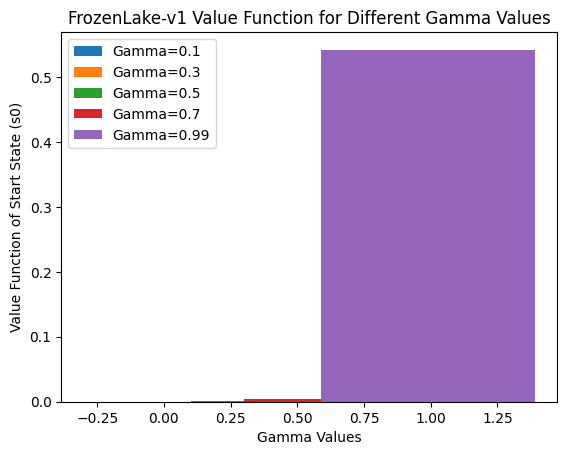

Taxi-v3 Optimal Policy for Gamma=0.1: [4 4 4 4 1 0 1 1 0 1 0 1 1 1 1 0 5 0 0 0 3 3 3 3 1 0 1 1 0 1 0 1 1 1 1 0 3
 0 0 0 0 1 0 1 2 2 2 2 0 1 0 1 1 0 1 0 0 2 0 0 0 1 1 1 2 2 2 2 1 1 0 1 1 0
 1 0 0 2 0 0 0 1 1 1 4 4 4 4 1 1 0 1 1 0 1 0 0 5 0 0 1 1 1 1 1 0 1 1 0 1 0
 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 2 2 2
 0 1 0 1 1 0 1 0 0 2 0 0 0 1 0 1 1 2 2 2 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 2 1 2 0 0 0 0 1 2 1 2 1 2 0 2 1 1
 1 1 1 2 1 2 3 3 3 3 2 2 2 2 1 2 3 2 3 1 3 3 1 2 2 2 3 1 3 3 2 2 2 2 3 1 3
 2 3 1 3 1 1 1 1 2 3 1 3 1 0 0 0 0 3 1 3 0 3 1 3 1 1 1 1 1 3 1 3 1 0 0 0 0
 3 1 3 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 2 1 1 1 1 1
 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 4 4 4 4 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 4 4 4

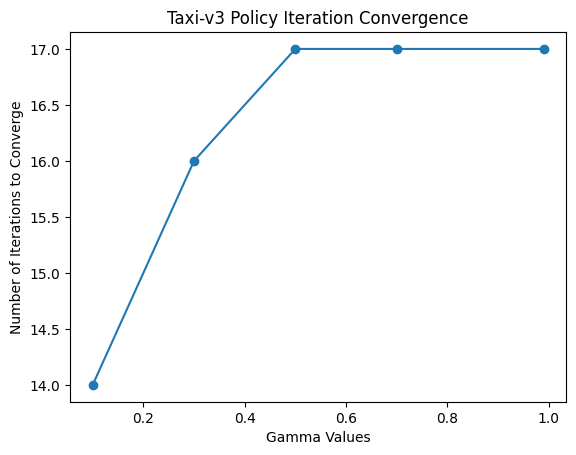

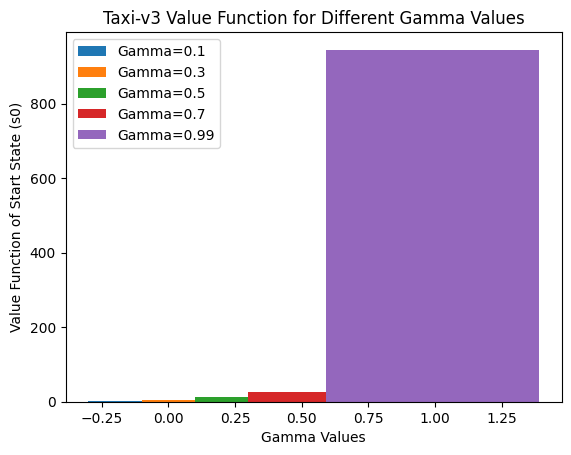

In [ ]:
def policyEvaluation(policy, env, gamma, epsilon=1e-6):
    statesNum = env.observation_space.n
    V = np.zeros(statesNum)
    actionsNum = env.action_space.n

    while True:
        delta = 0

        for state in range(statesNum):
            action = policy[state]
            v = V[state]
            temp = 0

            for trans_prob, next_state, reward, _ in env.P[state][action]:

                temp += trans_prob * ( gamma * V[next_state] + reward)

            V[state] = temp
            delta = max(delta, abs(v - V[state]))

        if delta < epsilon:
            break
    return V

def policyImprovement(policy, V, env, gamma):
    policy_stable = True

    statesNum = env.observation_space.n
    actionsNum = env.action_space.n

    for state in range(statesNum):

        prevAct = policy[state]
        state_action_values = np.zeros(actionsNum)

        for action in range(actionsNum):

            for trans_prob, next_state, reward, _ in env.P[state][action]:
                state_action_values[action] += trans_prob * (gamma * V[next_state] +reward )

        policy[state] = np.argmax(state_action_values)

        if prevAct != policy[state]:
            policy_stable = False

    return policy, policy_stable

def policyIteration(env, gamma, epsilon=1e-6):
    statesNum = env.observation_space.n
    actionsNum = env.action_space.n
    policy = np.ones(statesNum, dtype=int)  # Initialize a random policy
    V = np.zeros(statesNum)
    iterations = 0

    while True:
        V = policyEvaluation(policy, env, gamma, epsilon)
        policy, policy_stable = policyImprovement(policy, V, env, gamma)
        iterations += 1

        if policy_stable:
            break

    return policy, V, iterations

gammas = [0.1, 0.3, 0.5, 0.7, 0.99]


env_frozenlake = gym.make('FrozenLake-v1', is_slippery=True)
frozenlake_iterations = []
frozenlake_optimal_policies = []
frozenlake_value_functions = []

for gamma in gammas:

    optimal_policy, V, iterations = policyIteration(env_frozenlake, gamma)
    frozenlake_optimal_policies.append(optimal_policy)
    frozenlake_value_functions.append(V[0])
    frozenlake_iterations.append(iterations)


for gamma, optimal_policy in zip(gammas, frozenlake_optimal_policies):
    print(f'FrozenLake-v1 Optimal Policy for Gamma={gamma}: {optimal_policy}')

IterationsVSGamma(gammas, frozenlake_iterations, 'FrozenLake-v1 Policy Iteration Convergence')
ConvergeValFUnction(frozenlake_value_functions, gammas, 'FrozenLake-v1 Value Function for Different Gamma Values')


env_taxi = gym.make('Taxi-v3')
taxi_iterations = []
taxi_optimal_policies = []
taxi_value_functions = []

for gamma in gammas:

    optimal_policy, V, iterations = policyIteration(env_taxi, gamma)
    taxi_optimal_policies.append(optimal_policy)
    taxi_value_functions.append(V[0])
    taxi_iterations.append(iterations)

for gamma, optimal_policy in zip(gammas, taxi_optimal_policies):
    print(f'Taxi-v3 Optimal Policy for Gamma={gamma}: {optimal_policy}')

IterationsVSGamma(gammas, taxi_iterations, 'Taxi-v3 Policy Iteration Convergence')
ConvergeValFUnction(taxi_value_functions, gammas, 'Taxi-v3 Value Function for Different Gamma Values')


**Q3 Solution**
The performance of Policy Iteration vs. Value Iteration depends on the specific characteristics of the environment. In some cases, Value Iteration might converge faster, especially in simpler environments. However, Policy Iteration can be more effective in environments where the optimal policy can be found with fewer evaluations.

It's important to note that the actual convergence behavior can vary based on the specific details of the environment, such as the size of the state space, the complexity of the transitions, and the nature of the reward structure. It's recommended to experiment with both algorithms and analyze their performance in the specific context of the problem at hand.

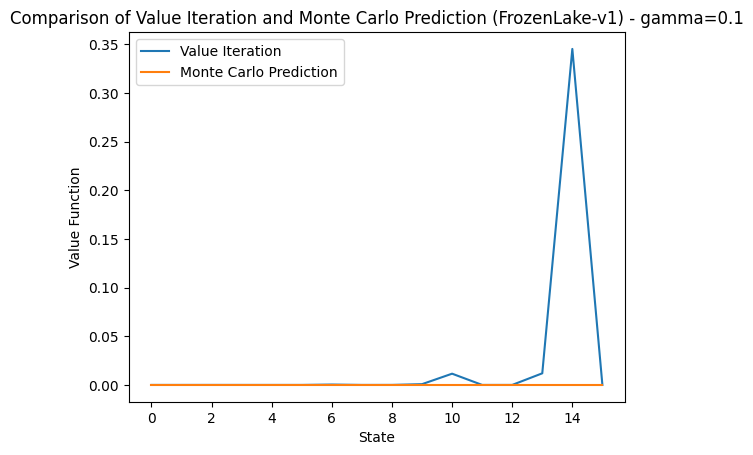

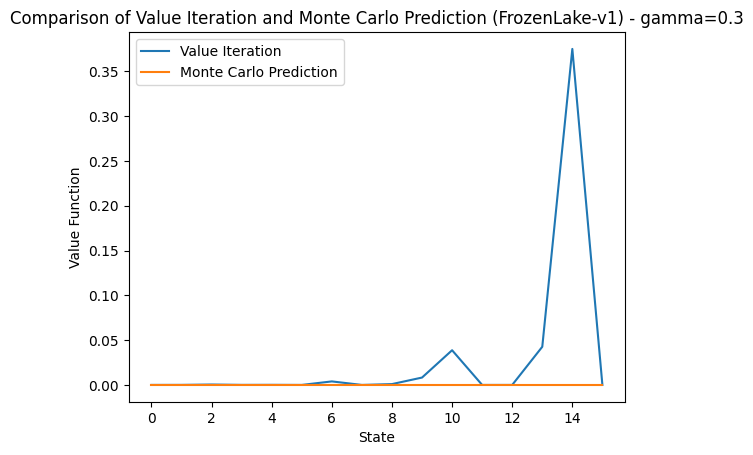

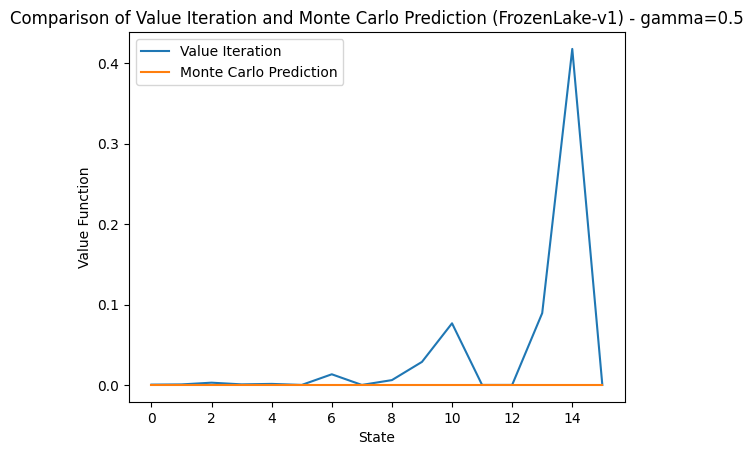

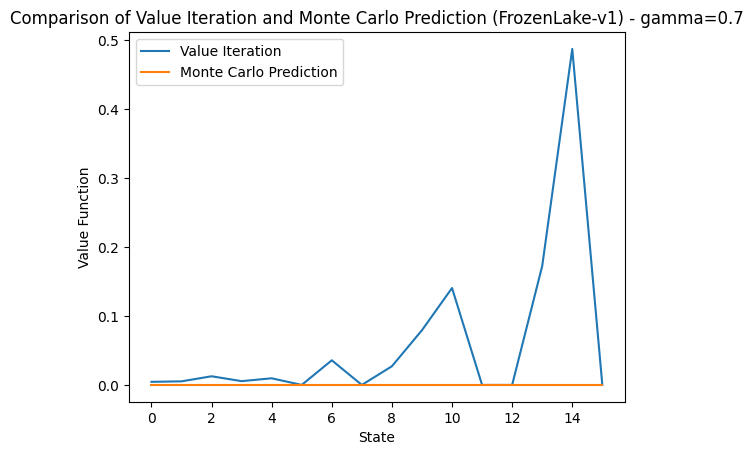

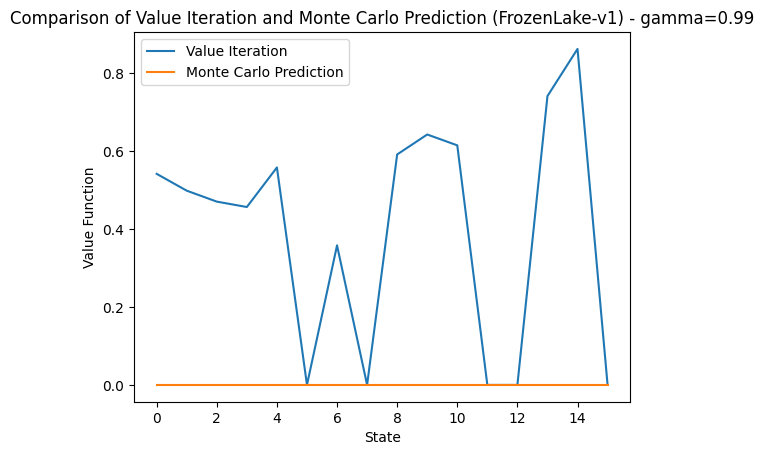

In [ ]:
def generateEpisode(env, policy):
    state = env.reset()
    episode = []
    while True:

        action = policy[state]
        next_state, reward, done, _ = env.step(action)
        episode.append((state, reward))
        state = next_state

        if done:
            break

    return episode

def monteCarloPrediction(env, policy, episodesNum=1000, gamma=0.3):
    statesNum = env.observation_space.n
    CountReturns = np.zeros(statesNum)
    Returns = np.zeros(statesNum)

    V = np.zeros(statesNum)

    for _ in range(episodesNum):
        episode = generateEpisode(env, policy)
        G = 0
        visited_states = set()

        for t in range(len(episode) - 1, -1, -1):
            state, reward = episode[t]
            G = reward + gamma * G

            if state not in visited_states:

                Returns[state] += G
                CountReturns[state] += 1

                V[state] = Returns[state] / CountReturns[state] # averaging
                visited_states.add(state)

    return V

env_frozenlake = gym.make('FrozenLake-v1', is_slippery=True)
gammas = [0.1, 0.3, 0.5, 0.7, 0.99]

for gamma in gammas:

    V_value_iteration, _, _ = ValueIteration(env_frozenlake, gamma)
    V_monte_carlo = monteCarloPrediction(env_frozenlake, policy_random, episodesNum=1000, gamma=gamma)

    plt.figure()
    plt.plot(V_value_iteration, label='Value Iteration')
    plt.plot(V_monte_carlo, label='Monte Carlo Prediction')
    plt.title(f'Comparison of Value Iteration and Monte Carlo Prediction (FrozenLake-v1) - gamma={gamma}')
    plt.xlabel('State')
    plt.ylabel('Value Function')
    plt.legend()

plt.show()




#1. Navigate the tunnels by flapping the wings 🐦

In this part, we will use premitive RL techniques to navigate in Flappy Bird environemnt.  


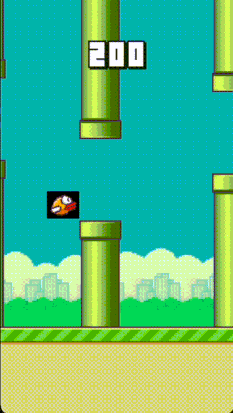

The "FlappyBird-v0" environment, yields simple numerical information about the game's state as observations or RGB-arrays (images) representing the game's screen.
FlappyBird-v0
## Observation Space
We will use the 2nd option which gives us a state space with the last and next pipe's Horizontal and vertical Position as follows.

    the last pipe's horizontal position
    the last top pipe's vertical position
    the last bottom pipe's vertical position
    the next pipe's horizontal position
    the next top pipe's vertical position
    the next bottom pipe's vertical position
    the next next pipe's horizontal position
    the next next top pipe's vertical position
    the next next bottom pipe's vertical position
    player's vertical position
    player's vertical velocity
    player's rotation
Action space

    0 - do nothing
    1 - flap

Rewards

    +0.1 - every frame it stays alive
    +1.0 - successfully passing a pipe
    -1.0 - dying
    −0.5 - touch the top of the screen
The environment is made finate by reseting the env when score reaches till 20. I.e. we have to only consider till 20 pipes and not more than that.


Q1: Explain the Markov Decision Process using State Transition diagram for this task. Discuss about States.Actions, Rewards, Transition Probabilities for this task. **[15 points]**

Q2: Implement Value Iteration on this environment.
 Use 3 different values of the γ paramter i.e. [0.1,0.5,0.99] and record the number of iterations required to converge in each case, use plots to show. Here convergence simply means to reach till pipe 20.**[20 points]**

 Q3: Implement Policy iteration on this environment. Using four different values of γ parameter i.e. [0.1,0.5,0.99] and record number of iterations required to converge in each case, use plots to show.   **[20 points]**

Q4: Compare and plot the average total reward for both the algorithms for different γ parameters. Comment on your observations from the plots; Is there any algorithm specific advatage in this environment.

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

class FlappyEnvironment(gym.Env):
    def __init__(self):
        self.completed = False

        self.agentVertical = 0.5
        self.agentVertVelocity = 0
        self.agentAngle = 0

        self.Observations = gym.spaces.Box(low=0, high=1, shape=(11,), dtype=np.float32)
        self.Actions = gym.spaces.Discrete(2)

        self.next2Horzpipe = 2.0
        self.next2VerToppipe = 0
        self.next2VerLowpipe = 0
        self.prevHorzpipe = 0
        self.prevVerToppipe = 0
        self.prevVerLowpipe = 0
        self.nextHorzpipe = 1.0
        self.nextVerToppipe = 0
        self.nextVerLowpipe = 0


    def reset(self):
        self.completed = False

        self.agentVertical = 0.5
        self.agentVertVelocity = 0
        self.agentAngle = 0

        self.next2Horzpipe = 2.0
        self.next2VerToppipe = 0
        self.next2VerLowpipe = 0
        self.prevHorzpipe = 0
        self.prevVerToppipe = 0
        self.prevVerLowpipe = 0
        self.nextHorzpipe = 1.0
        self.nextVerToppipe = 0
        self.nextVerLowpipe = 0

        return self.observationEnv()

    def step(self, action):
        if action == 1:
            self.agentVertVelocity = -0.1

        self.agentVertVelocity += 0.01
        self.agentVertical += self.agentVertVelocity

        self.prevHorzpipe -= 0.01
        self.nextHorzpipe -= 0.01
        self.next2Horzpipe -= 0.01

        if self.collisionEnv():
            self.completed = True

        if self.nextHorzpipe < 0.5:
            self.completed = True

        return self.observationEnv(), self.rewardEnv(), self.completed, {}

    def observationEnv(self):
        return np.array(
            [self.prevHorzpipe, self.prevVerToppipe,
                         self.prevVerLowpipe, self.nextHorzpipe,
                         self.nextVerToppipe, self.nextVerLowpipe,
                         self.next2Horzpipe, self.next2VerToppipe,
                         self.next2VerLowpipe, self.agentVertical,
                         self.agentVertVelocity, self.agentAngle]
            )
    def rewardEnv(self):
        if self.completed:
            return -1.0
        elif self.agentVertical < self.nextVerToppipe or self.agentVertical > self.nextVerLowpipe:
            return -0.5
        elif self.nextHorzpipe <= 0.5:
            return 1.0
        elif self.agentVertical < 0 or self.agentVertical > 1:
            return -1.0
        else:
            return 0.1

    def collisionEnv(self):
        if self.agentVertical < 0 or self.agentVertical > 1:
            return True
        if (self.nextHorzpipe < 0.5) and ((self.agentVertical < self.nextVerToppipe) or (self.agentVertical > self.nextVerLowpipe)):
            return True
        return False

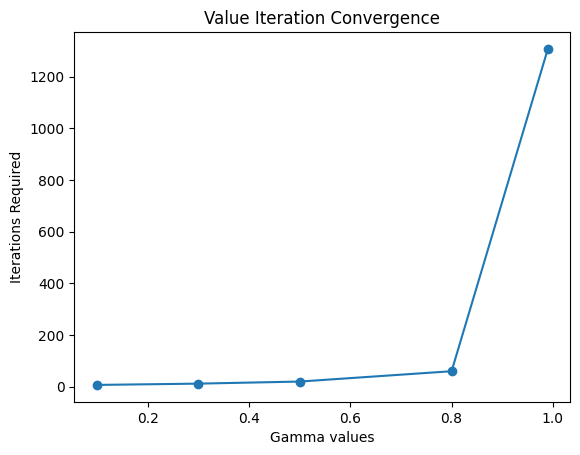

In [ ]:
def valueIteration(env, gamma):
    iterationCount = 0

    V = np.zeros(env.Observations.shape[0])
    accumulatedReward = []

    while True:
        delta = 0
        rewardCount = 0

        for state in range(env.Observations.shape[0]):
            maxVal = float('-inf')
            for action in range(env.Actions.n):

                newEnvCreate = FlappyEnvironment()
                newEnvCreate.__dict__ = env.__dict__.copy()
                nextState, reward, completed, _ = newEnvCreate.step(action)
                nextState_index = hash(tuple(nextState)) % len(V)
                rewardExpectation = reward + gamma * V[nextState_index]

                if rewardExpectation > maxVal:
                    maxVal = rewardExpectation

                rewardCount += reward
            delta = max(delta, np.abs(maxVal - V[state]))

            V[state] = maxVal
        iterationCount += 1

        accumulatedReward.append(rewardCount)
        if delta < 1e-6 or env.nextHorzpipe <= 0.5:
            break

    return iterationCount, accumulatedReward

gammas = [0.1, 0.3,0.5,0.8, 0.99]
iterations_required = []

env = FlappyEnvironment()

for gamma in gammas:

        env.reset()
        iterationCount, _ = valueIteration(env, gamma)
        iterations_required.append(iterationCount)

plt.plot(gammas, iterations_required, marker='o')
plt.xlabel('Gamma values')
plt.ylabel('Iterations Required')
plt.title('Value Iteration Convergence')
plt.show()



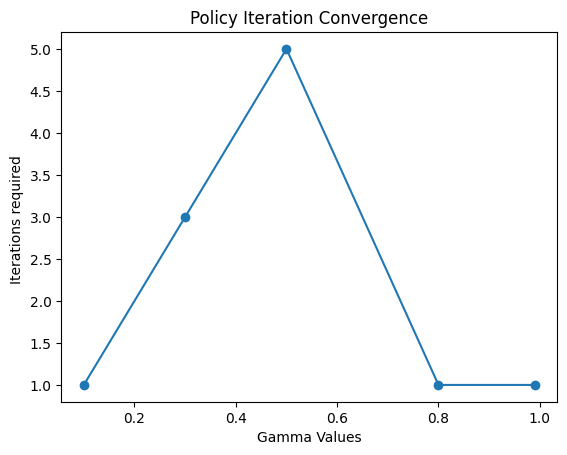

In [ ]:
def policyIteration(env, gamma):
    iterationCount = 0

    V = np.zeros(env.Observations.shape[0])
    policy = np.zeros(env.Observations.shape[0], dtype=int)

    accumulatedReward = []

    while True:
        while True:

          delta = 0
          rewardCount = 0

          for state in range(env.Observations.shape[0]):

              oldVal = V[state]
              action = policy[state]

              nextState, reward, completed, _ = env.step(action)
              nextState_index = hash(tuple(nextState)) % len(V)
              V[state] = reward + gamma * V[nextState_index]
              rewardCount += reward

              delta = max(delta, abs(oldVal - V[state]))
          if delta < 1e-10:
              break
          accumulatedReward.append(rewardCount)

        stablePolicy = True

        for state in range(env.Observations.shape[0]):

            prevAct = policy[state]
            maxVal = float('-inf')

            for action in range(env.Actions.n):
                env_copy = FlappyEnvironment()
                env_copy.__dict__ = env.__dict__.copy()

                nextState, reward, completed, _ = env_copy.step(action)
                nextState_index = hash(tuple(nextState)) % len(V)

                rewardExpectation = reward + gamma * V[nextState_index]

                if rewardExpectation > maxVal:
                    maxVal = rewardExpectation
                    policy[state] = action

            if prevAct != policy[state]:
                stablePolicy = False

        iterationCount += 1
        if stablePolicy is True:
            break

    return iterationCount, policy,  accumulatedReward

gammas = [0.1, 0.3, 0.5, 0.8,0.99]
iterations_required = []

env = FlappyEnvironment()

for gamma in gammas:
        env.reset()
        iterationCount, _, _ = policyIteration(env, gamma)
        iterations_required.append(iterationCount)

plt.plot(gammas, iterations_required, marker='o')
plt.xlabel('Gamma Values')
plt.ylabel('Iterations required ')
plt.title('Policy Iteration Convergence')
plt.show()



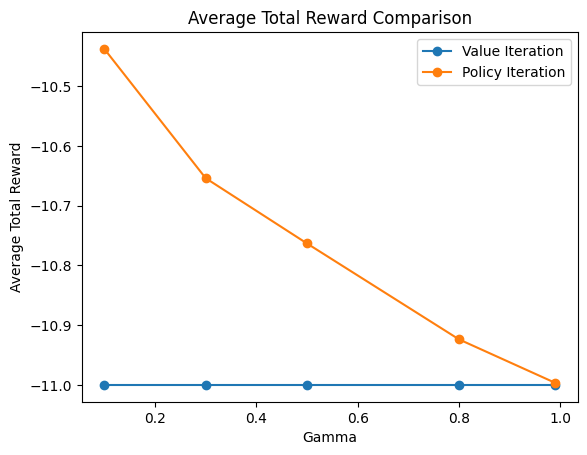

As we can see from the graph, in this case, the policy iteration algorithm has consistent average reward as compared to value iteration


In [ ]:

gammas = [0.1, 0.3, 0.5, 0.8, 0.99]
VIavgReward = []
PIavgReward = []

env = FlappyEnvironment()

for gamma in gammas:
        env.reset()
        nVI, trVI = valueIteration(env, gamma)
        VIavgReward.append(np.mean(trVI))

        nPI,_, trPI = policyIteration(env, gamma)
        PIavgReward.append(np.mean(trPI))

plt.plot(gammas, VIavgReward, marker='o', label='Value Iteration')
plt.plot(gammas, PIavgReward, marker='o', label='Policy Iteration')
plt.xlabel('Gamma')
plt.ylabel('Average Total Reward')
plt.title('Average Total Reward Comparison')
plt.legend()
plt.show()

print('As we can see from the graph, in this case, the policy iteration algorithm has consistent average reward as compared to value iteration')

# 2. Indian Colony on Moon

After the success of India’s Chandrayaan-3 mission, ISRO made tremendous advancements in space voyages. This led to the creation of Indian Moon Station (IMS) having multiple operational units and discovery of an extraterrestrial element (Moonergy) that can replace fossils on earth. However, there is a requirement of an optimal policy to perform a specific task and it has come to you to provide the solution for the same. The description of the task is as follows:

One IMS unit needs about 6 kg of Moonergy per day for sustenance. The fuel  tank in an IMS unit has a capacity of about 30 kg; this means that with a full tank, the unit can go six days without any refilling. Assume at the beginning of the scenario, a fuel tank is half filled.

The moon element extractor has an average carrying capacity of 164 kg, ample enough to meet the experimental demands of many units in the IMS. However, astronauts need to go out with special equipment on the lunar surface to search for Moonergy as it is difficult to locate. Each unit has only one such trained astronaut who can locate moonergy.  If multiple astronauts go out for search (from multiple units), the probability of a successful discovery and collection of moonergy per attempt has been observed to increase with group size to a point, and that each attempt by one astronaut consumes 0.5 kg of moonergy.

Suppose that the probabilities of a successful discovery are given by p(1) = 0.15, p(2) = 0.33, p(3) = 0.37, p(4) = 0.40, p(5) = 0.42, and p(6) = 0.43, where p(n) represents the success probability per attempt for astronaut exploring in a group of size n.

Q1. Formulate this as a Markov decision process, in which the state represents the IMS Unit’s energy reserves, the action is whether to search, and, if so, in what group size.**[10 points]**

Q.2. Assuming one attempt per day, find a strategy that maximizes the continuous unit operation over 15, 30 and 60 days. Assume that if the exploration is successful, the units in the group share the collected moonergy equally. Mention the choise of your algorithm for finding the policy and the choice of γ parameter. **[20 points]**

Q3. Investigate the sensitivity of above policy to the number of attempts per day and the yield of moonergy. Suppose the initial contents of the fuel tank at the beginning of a 30-day period are as follows  -[5, 10, 20, 30]. Plot the size of group per day for the 30-day period with your optimal policy and different initial content. Comment on your observation. **[20 points]**


**Q1 SOLUTION**

**State Space:**

The state represents the energy reserves of the IMS Unit, which can vary from 0 kg to 30 kg (half-filled tank to a full tank).

\[ S = \{0, 1, 2, 3, ..., 30\} \]

**Action Space:**

Search: This action represents sending astronauts on a Moonergy collection mission. The size of the astronaut group can be chosen from 1 to 6.

Idle: This action means keeping the astronauts within the IMS unit and not searching for Moonergy.


**Transition Probabilities:**

The transition probability between states depends on the current state, chosen action, and group size for Search action:

If the action is Idle, the state remains the same with probability 1.
If the action is Search with group size n:

If the search is successful, the new state is the current state + 164 kg - consumption (n * 0.5 kg). The success probability is p(n).

If the search is unsuccessful, the new state remains the same. The probability of failure is 1 - p(n).

**Rewards:**

Idle action: Reward of -1 kg (represents daily consumption without replenishment).

Successful Search: Reward of +164 kg (amount collected minus consumption).

Unsuccessful Search: Reward of -0.5 kg (consumption for the attempt).




In [ ]:
actionsNum = 7
statesNum = 31

successReward = 164
failReward = -0.5
idleReward = -1

transProbability = [0, 0.15, 0.33, 0.37, 0.40, 0.42, 0.43]
consumption_rate = 0.5
gamma = 0.8

iterationsCount = 1000

policy = np.zeros(statesNum, dtype=int)

def policyEvaluation(policy):

    V = np.zeros(statesNum)

    for _ in range(iterationsCount):
        temp = np.copy(V)

        for state in range(statesNum):
            action = policy[state]

            nxtState = max(int(state - action * consumption_rate), 0)

            if action == 0:
                reward = idleReward

            else:
                success = np.random.rand() < transProbability[action]
                reward = failReward * (1 - success) +successReward * success

            temp[state] =  gamma * V[nxtState] +reward

        V = np.copy(temp)
    return V

def policyImprovement(policy, V):

    updatedPolicy = np.zeros(statesNum, dtype=int)

    for state in range(statesNum):

        stateActReturn = [transProbability[a] * (successReward - consumption_rate * a) + gamma * V[max(int(state - a * consumption_rate), 0)] for a in range(actionsNum)]

        updatedPolicy[state] = np.argmax(stateActReturn)

    return updatedPolicy

def policyIteration(policy, daysNum):

    for day in range(daysNum):

        updatedV = policyEvaluation(policy)
        updatedPolicy = policyImprovement(policy, updatedV)

        if np.array_equal(policy, updatedPolicy):
            break

        policy = updatedPolicy
    return policy

days_nums = [15, 30, 60]
optimal_policies = {}
for days_num in days_nums:

    policy = np.zeros(statesNum, dtype=int)
    policy = policyIteration(policy, daysNum=days_num)
    optimal_policies[days_num] = policy

for days_num, policy in optimal_policies.items():

    print(f"Optimal Policy (Group Sizes) for {days_num} days:", policy)


Optimal Policy (Group Sizes) for 15 days: [6 6 6 6 0 2 0 2 4 6 0 2 4 6 4 6 6 0 2 4 6 6 0 2 4 6 6 0 2 4 6]
Optimal Policy (Group Sizes) for 30 days: [6 0 2 4 6 6 2 4 6 4 6 0 2 4 6 6 6 6 2 4 6 4 6 4 6 2 0 2 4 6 0]
Optimal Policy (Group Sizes) for 60 days: [6 0 2 4 6 0 2 4 6 6 6 6 6 6 0 2 4 6 6 6 6 4 6 6 4 6 6 0 2 4 6]


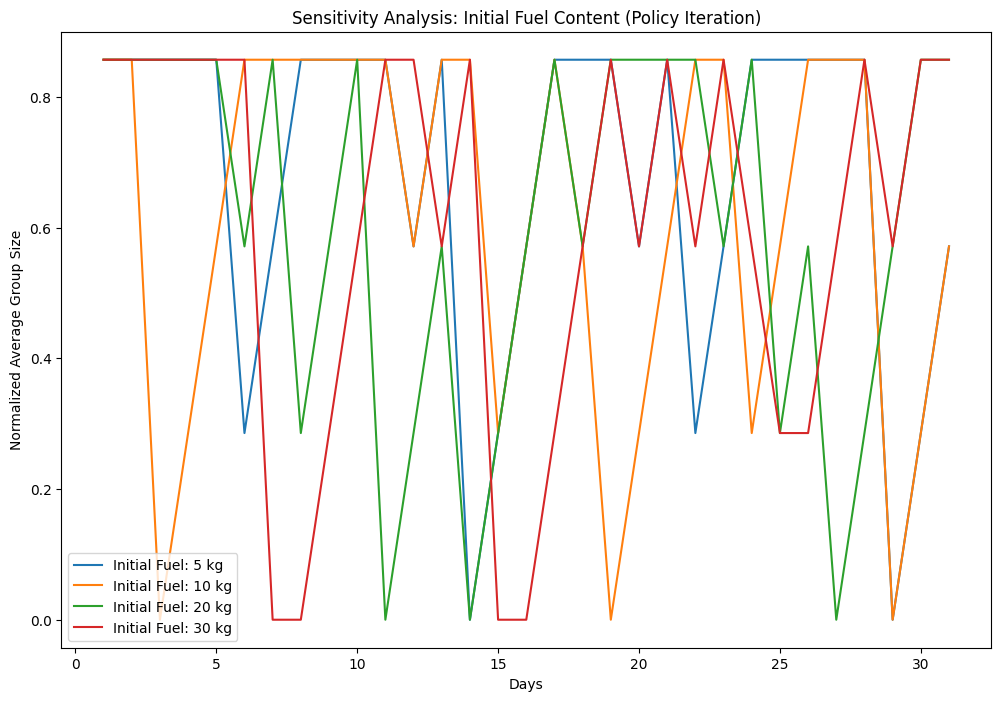

In [ ]:
daysNum = 30
initial_fuel_contents = [5, 10, 20, 30]
plt.figure(figsize=(12, 8))

for initial_fuel_content in initial_fuel_contents:
    policy = np.zeros(statesNum, dtype=int)
    group_sizes_per_day = policyIteration(policy, daysNum)
    normalized_group_sizes = group_sizes_per_day / actionsNum
    plt.plot(np.arange(1, daysNum + 2), normalized_group_sizes, label=f'Initial Fuel: {initial_fuel_content} kg')

plt.xlabel('Days')
plt.ylabel('Normalized Average Group Size')
plt.legend()
plt.title('Sensitivity Analysis: Initial Fuel Content (Policy Iteration)')
plt.show()


#3. Inventory Control for Paint Brushes

Daily demand for paint brushes at a particular store follows this demand distribution:

|     |      |     |      |      |  |
| ------ | --- | ---- | --- | ---- | ---- |
| DEMAND       | 0      | 1        | 2      | 3        | 4        |
| Prob.        | 0.7    | 0.15     | 0.1    | 0.04     | 0.01     |

The stock level is checked every 4th evening. When demand is more and stock level is low, an order is placed to centeral warehouse. Stock comes two day later and available for ordering third day. If the demand of paint-brush at the store is not fulfilled at any day, a penalty is applied to the store for this.

There are multiple costs for stocking the paint-brushes that includes ordering, holding and shortage costs under the assumption that there are fixed prices for:
 * placing an order : ₹0.20,
 * daily per unit holding cost is ₹0.01, and
 * per unit penalty cost for unfilled demand is ₹0.50.
 * Assume a continuous operation of 64 days and at the end, each remaining unit's value reduces by ₹0.70 adding to the wastage cost.


#Questions

Q1. Formulate the above problem as an MDP; mention all the key components and Print the reward and transition matrix. **[10 points]**

Q2. Find a policy which minimizes the expected total cost. Plot the total accumulated reward against each episode while training. Mention your choice of parameters and algorithm. **[30 points]**

Q3.Comment on the senstivity of total expected cost with respect to review period. If the review is done every 7 days, what is the effect on total expected cost? **[10 points]**

In [ ]:
transProbabilities = [0.7, 0.15, 0.1, 0.04, 0.01]

penaltyCost = -0.50
wasteCost = -0.70
maxStock = 4
orderCost = -0.20
holdingCost = -0.01

statesNum = maxStock + 1
actionsNum = 2

R = np.zeros((statesNum, actionsNum, statesNum))

for state in range(statesNum):

    for action in range(actionsNum):
        if action == 1:
            orderNum = 1
        else:
            orderNum =0

        for demand in range(statesNum):

            nxtState = min(abs(state + orderNum - demand), maxStock)
            penalty = max(0, demand - state - orderNum) * penaltyCost
            R[state, action, nxtState] = holdingCost * state + orderCost * orderNum +  penalty

P = np.zeros((statesNum, actionsNum, statesNum))

for state in range(statesNum):
    for action in range(actionsNum):

        if action == 1:
            orderNum = 1
        else:
            orderNum =0
        for demand in range(statesNum):
            nxtState = min(abs(state + orderNum - demand), maxStock)
            P[state, action, nxtState] += transProbabilities[demand]

print("\nThe Rewards Matrix:\n")
print(R)
print("\nThe Transition Probability Matrix:\n")
print(P)



The Rewards Matrix:

[[[-0.   -0.5  -1.   -1.5  -2.  ]
  [-0.2  -0.7  -1.2  -1.7   0.  ]]

 [[-0.01 -0.51 -1.01 -1.51  0.  ]
  [-0.21 -0.71 -1.21  0.    0.  ]]

 [[-0.02 -0.52 -1.02  0.    0.  ]
  [-0.22 -0.72 -0.22 -0.22  0.  ]]

 [[-0.03 -0.53 -0.03 -0.03  0.  ]
  [-0.23 -0.23 -0.23 -0.23 -0.23]]

 [[-0.04 -0.04 -0.04 -0.04 -0.04]
  [ 0.   -0.24 -0.24 -0.24 -0.24]]]

The Transition Probability Matrix:

[[[0.7  0.15 0.1  0.04 0.01]
  [0.15 0.8  0.04 0.01 0.  ]]

 [[0.15 0.8  0.04 0.01 0.  ]
  [0.1  0.19 0.71 0.   0.  ]]

 [[0.1  0.19 0.71 0.   0.  ]
  [0.04 0.11 0.15 0.7  0.  ]]

 [[0.04 0.11 0.15 0.7  0.  ]
  [0.01 0.04 0.1  0.15 0.7 ]]

 [[0.01 0.04 0.1  0.15 0.7 ]
  [0.   0.01 0.04 0.1  0.85]]]


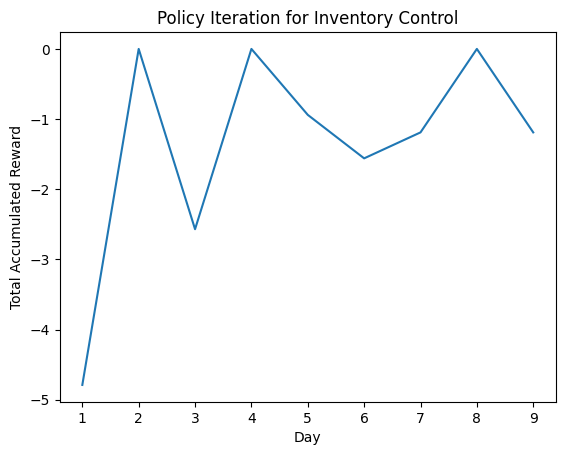

Final Policy: [0 0 0 0 1]


In [ ]:

discount_factor = 0.99
num_iterations = 10000
daysCount = 64

def policyEvaluation(policy):

    V = np.zeros(statesNum)
    for _ in range(num_iterations):
        new_V = np.copy(V)

        for state in range(statesNum):

            action = policy[state]
            quantityOrdered = 1 if action == 1 else 0

            transProbabilities = [0.7, 0.15, 0.1, 0.04, 0.01]
            demand = np.random.choice(statesNum, p=transProbabilities)

            next_state = min(state + quantityOrdered - demand, maxStock)
            penalty = max(0, demand - state - quantityOrdered) * penaltyCost

            reward = orderCost  * quantityOrdered +holdingCost * state + penalty
            new_V[state] = reward + discount_factor * V[next_state]

        V = np.copy(new_V)
    return V

def PolicyImprovement(V):
    improvedPolicy = np.zeros(statesNum, dtype=int)
    for state in range(statesNum):

        action_returns = [orderCost  +holdingCost * state - penaltyCost * max(0, demand - state - quantityOrdered) + discount_factor * V[min(state + quantityOrdered - demand, maxStock)] for quantityOrdered in range(actionsNum)]
        improvedPolicy[state] = np.argmax(action_returns)

    return improvedPolicy

def PolicyIteration():
    policy = np.zeros(statesNum, dtype=int)
    accRewards = []

    for day in range(daysCount):

        current_V = policyEvaluation(policy)
        improvedPolicy = PolicyImprovement(current_V)

        if np.array_equal(policy, improvedPolicy):
            break

        policy = improvedPolicy
        rewardCollected = 0

        state = 0
        for _ in range(4):
            action = policy[state]
            if action == 1:
                quantityOrdered = 1
            else :
                quantityOrdered = 0

            transProbabilities = [0.7, 0.15, 0.1, 0.04, 0.01]
            demand = np.random.choice(statesNum, p=transProbabilities)

            state = min(state + quantityOrdered - demand, maxStock)
            rewardCollected += orderCost  * quantityOrdered +holdingCost * state + max(0, demand - state - quantityOrdered) * penaltyCost


        rewardCollected += wasteCost * state
        accRewards.append(rewardCollected)

    return policy, accRewards
policyObtained, CumulativeReward = PolicyIteration()

plt.plot(np.arange(1, len(CumulativeReward) + 1), CumulativeReward)
plt.xlabel('Day')
plt.ylabel('Total Accumulated Reward')
plt.title('Policy Iteration for Inventory Control')
plt.show()
print("Final Policy:", policyObtained)


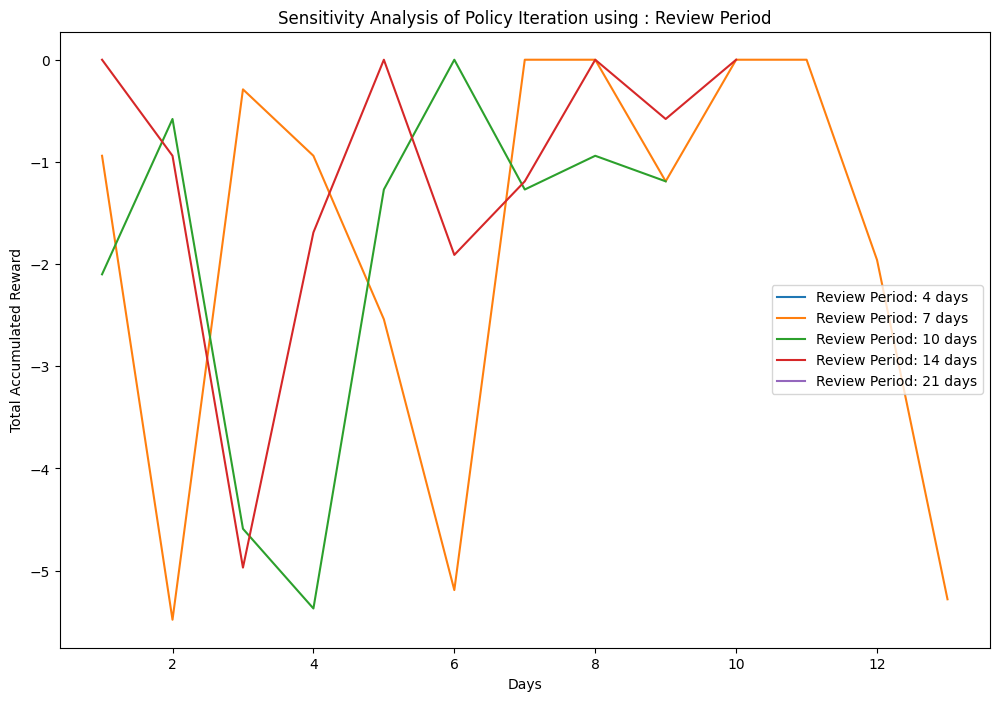

Review Period: 4 days, Total Expected Cost: 0.41999999999999993
Review Period: 7 days, Total Expected Cost: -0.8315384615384618
Review Period: 10 days, Total Expected Cost: -0.9233333333333336
Review Period: 14 days, Total Expected Cost: -0.1280000000000001
Review Period: 21 days, Total Expected Cost: -0.18999999999999995


In [ ]:
reviewArray = [4, 7, 10, 14, 21]
plt.figure(figsize=(12, 8))
C = []

for r in reviewArray:

    num_days = 64 // r * r
    policy, reward = PolicyIteration()

    plt.plot(np.arange(1, len(reward) + 1), reward, label=f'Review Period: {r} days')
    totalCost = np.sum(reward) / len(reward)+1
    C.append(totalCost)

plt.xlabel('Days')
plt.ylabel('Total Accumulated Reward')
plt.legend()
plt.title('Sensitivity Analysis of Policy Iteration using : Review Period')
plt.show()

for i, j in enumerate(reviewArray):

    print(f"Review Period: {j} days, Total Expected Cost: {C[i]}")